In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

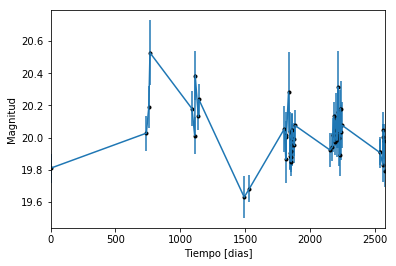

In [2]:
data = np.genfromtxt('LC_Z_49159.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

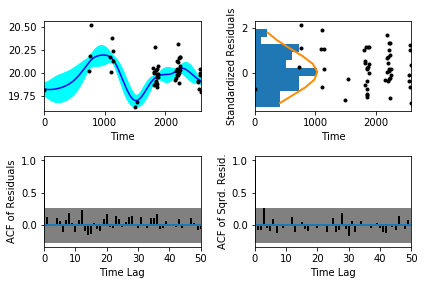

In [5]:
sample.assess_fit()

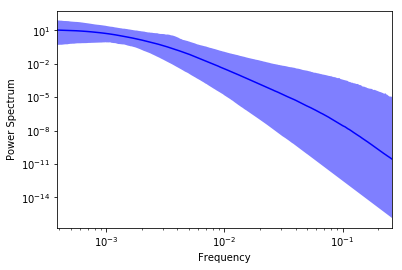

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

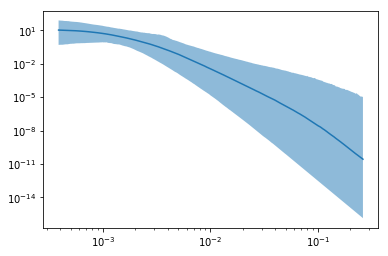

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

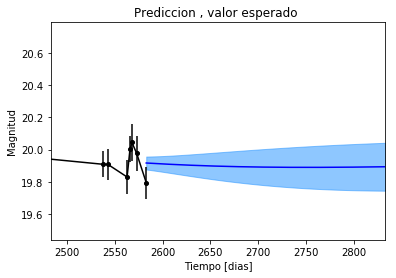

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

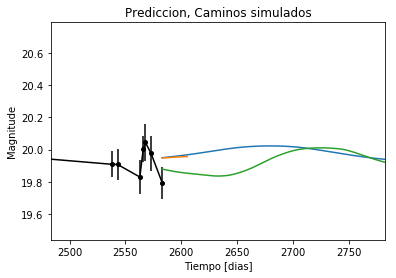

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


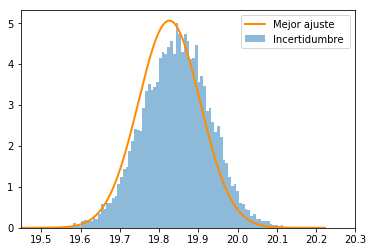

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

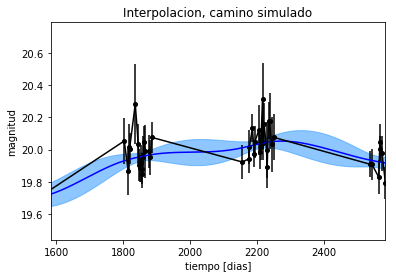

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

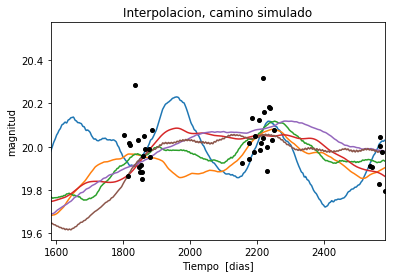

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 353.58379469
Median: 0.00191895951128
Standard deviation: 0.122441868896
68% credibility interval: [ 0.          0.16056211]
95% credibility interval: [ 0.          0.44470476]
99% credibility interval: [ 0.          0.50476989]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 353.58379469
Median: 0.00191895951128
Standard deviation: 0.122441868896
68% credibility interval: [ 0.          0.16056211]
95% credibility interval: [ 0.          0.44470476]
99% credibility interval: [ 0.          0.50476989]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 456.87259218
Median: 0.0
Standard deviation: 0.000763641096855
68% cre

Plotting parameter summary


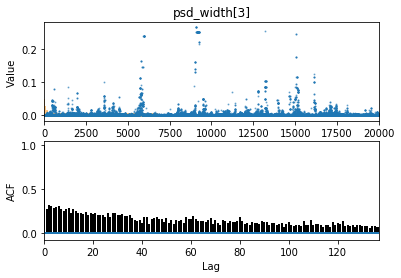

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1495.59256273
Median: 58.1368730302
Standard deviation: 1.60999086526
68% credibility interval: [ 56.37249249  59.26848368]
95% credibility interval: [ 53.84924191  60.01015056]
99% credibility interval: [ 51.73737507  60.34088759]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 563.53494362
Median: 0.410316626036
Standard deviation: 1.06180392518
68% credibility interval: [ 0.05137217  1.98388076]
95% credibility interval: [ 0.01694852  3.59387002]
99% credibility interval: [ 0.0115775   4.60662407]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 633.94794454
Median: 0.0867525790798
Standard deviation: 2.17268914712
68% credibility interval: [ 0.00544577  1.92211064]
95% credibility interval: [  6.20389224e-04

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2737.37292664
Median: 3.88659285229e-34
Standard deviation: 2.62714105471e+72
68% credibility interval: [  1.23954868e-75   8.44859842e-03]
95% credibility interval: [  3.15161244e-102   2.20368186e+019]
99% credibility interval: [  8.33574861e-123   7.85268826e+039]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1731.20652997
Median: 19.9652252445
Standard deviation: 0.0999066840071
68% credibility interval: [ 19.88714323  20.04243467]
95% credibility interval: [ 19.75519072  20.16657868]
99% credibility interval: [ 19.63258696  20.29117511]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 353.58379469
Median: 0.00191895951128
Standard deviation: 0.122441868896
68% credibility interval: [ 0.          0.16056211]
95% credibility interval: [ 0.          0.44470476]
99% credibility interval: [ 0.          0.50476989]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 353.58379469
Median: 0.00191895951128
Standard deviation: 0.122441868896
68% credibility interval: [ 0.          0.16056211]
95% credibility interval: [ 0.          0.44470476]
99% credibility interval: [ 0.          0.50476989]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 456.87259218
Median: 0.0
Standard deviation: 0.000763641096855
68% cre

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1495.59256273
Median: 58.1368730302
Standard deviation: 1.60999086526
68% credibility interval: [ 56.37249249  59.26848368]
95% credibility interval: [ 53.84924191  60.01015056]
99% credibility interval: [ 51.73737507  60.34088759]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 672.727449266
Median: 0.0046460487667
Standard deviation: 0.0930022386955
68% credibility interval: [ 0.0007251   0.07500976]
95% credibility interval: [ 0.00041818  0.36571679]
99% credibility interval: [  3.93402972e-04   4.94119077e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 677.483230418
Median: 0.00149228265223
Standard deviation: 0.040265829564
68% credibility interval: [ 0.00055336  0.01317586]
95% credibility interval: [ 0.00040812  0.13085201]
99% credibility interval: [ 0.0003914   0.28398196]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 976.93615823
Median: 0.0140876459052
Standard deviation: 0.12409904

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1620.07078016
Median: 0.0328844451421
Standard deviation: 0.0548693087655
68% credibility interval: [ 0.01679058  0.07005839]
95% credibility interval: [ 0.00872301  0.16150657]
99% credibility interval: [ 0.00603413  0.35448242]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2217.31378261
Median: 0.887349405754
Standard deviation: 0.139576154833
68% credibility interval: [ 0.76827608  1.0401379 ]
95% credibility interval: [ 0.67345204  1.21912471]
99% credibility interval: [ 0.62359026  1.34670012]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1075.99911627
Median: 1.81765498644e-05
Standard deviation: 0.0114485537598
68% credibility interval: [  2.87297272e-07   7.78010275e-04]
95% credibility interval: [  1.49886855e-23   1.20956186e-02]
99% credibility interval: [  9.50704294e-44   7.46507308e-02]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 672.727449266
Median: (-0.0291919853474+0j)
Standard deviation: 0.966088067399
68% credibility interval: [-0.47130023-1.1767267j  -0.00455594-0.01200236j]
95% credibility interval: [-2.29786635+0.j         -0.00262749-3.16811937j]
99% credibility interval: [ -3.10464172e+00+0.j          -2.47182378e-03-0.00959372j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 677.483230418
Median: (-0.00937628843464+0.696981898863j)
Standard deviation: 0.809857210606
68% credibility interval: [-0.08278637+1.82803821j -0.00347687+0.00587494j]
95% credibility interval: [-0.82216740+0.42828995j -0.00256429+0.687624j  ]
99% credibility interval: [-1.78431126+1.65716441j -0.00245927+0.00400913j]
Posterior summary for parameter ar_roots  

Plotting 2d PDF w KDE


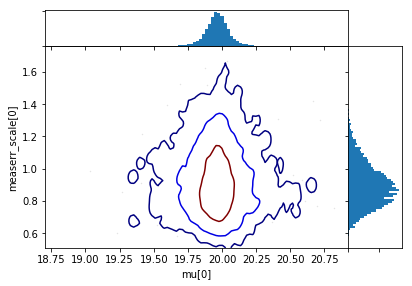

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


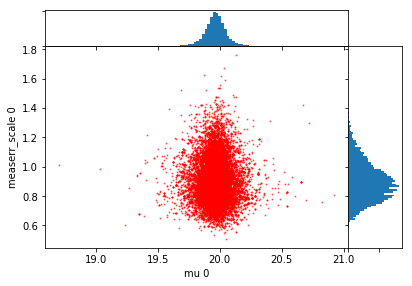

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)